# Imports and Functions

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.logspace(-7, 0, 100)

def Corr_curve_3d(tc, offset, GN0, A1, txy1, alpha1, AR1, B1, tauT1 ):

    txy1 = txy1 / 1000

    tauT1 = tauT1 / 1000

    G_Diff =  (A1*(((1+((tc/txy1)**alpha1))**-1)*(((1+(tc/((AR1**2)*txy1)))**-0.5))))

    G_T = 1 + (B1*np.exp(tc/(-tauT1)))

    return offset + GN0 * G_Diff * G_T



def def_clicked(_):
    print("default")
    
def f_3d_Tri_1 (offset, GN0, A, txy, alpha, AR, B, T_tri):
    #ax.clear()
    ax.plot(x, Corr_curve_3d(x, offset, GN0, A, txy, alpha, AR, B, T_tri ))
    ax.set_xscale('log')
    




<IPython.core.display.Javascript object>


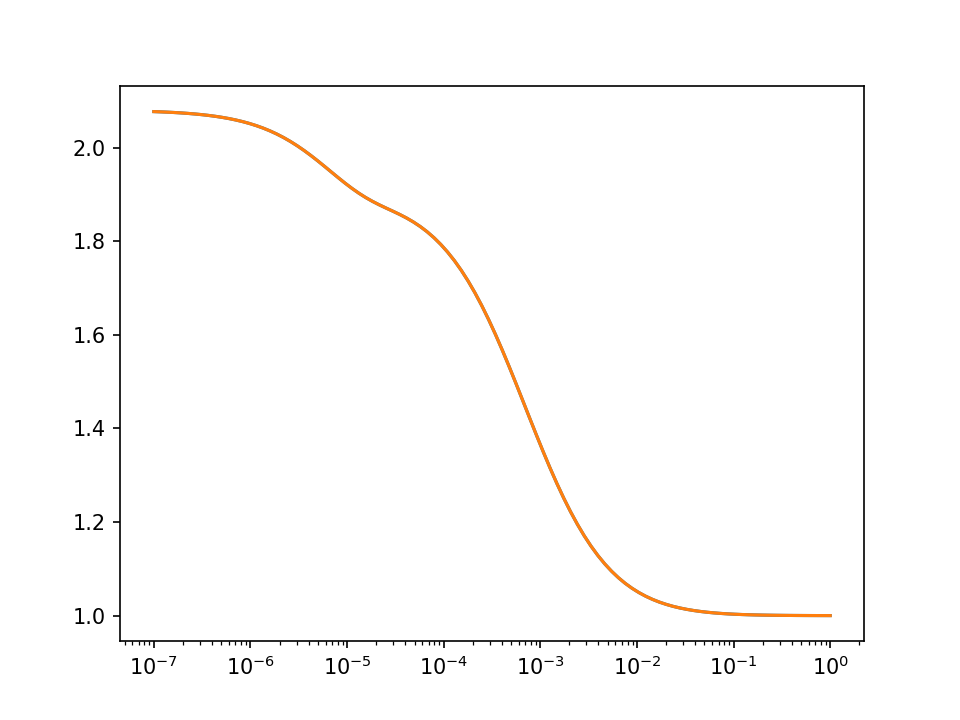

interactive(children=(FloatSlider(value=1.0, description='offset', max=10.0), FloatSlider(value=0.9, descripti…

In [2]:
#-----------------------------------------------------------
#    3D     Triplet    One component
#-----------------------------------------------------------
#-----------------------------------------------------------

list_of_params = ['offset', 'GN0', 'A', 'txy', 'alpha', 'AR', 'B', 'T_tri' ]
list_of_inits = [1, 0.9, 1, 0.7, 1, 7, 0.2, 0.006]
list_of_min = [0, 0, 0, 0.05, 0.5, 2, 0.01, 0]
list_of_max = [10, 50, 1, 10, 1.5, 20, 1, 0.05]
list_of_steps = [0.1, 0.1, 0.05, 0.01, 0.01, 0.1, 0.05, 0.005  ]




fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, Corr_curve_3d(x, *list_of_inits))
ax.set_xscale('log')


sliders = {}
list_of_sliders = []

for i in range(len(list_of_params)):
    sliders[list_of_params[i]] = widgets.FloatSlider(description = list_of_params[i], value=list_of_inits[i], min=list_of_min[i], max=list_of_max[i], step=list_of_steps[i])
    list_of_sliders.append(sliders[list_of_params[i]])
    sliders[list_of_params[i]].msg_throttle = 1


button_def = widgets.Button(description='Default')
button_def.on_click(def_clicked)


#list_of_sliders.append(button_def)




interact(f_3d_Tri_1, offset = sliders['offset'], 
        GN0 = sliders['GN0'],
        A = sliders['A'],
        txy = sliders['txy'],
        alpha = sliders['alpha'],
        AR = sliders['AR'],
        B = sliders['B'],
        T_tri = sliders['T_tri']);



